<a href="https://colab.research.google.com/github/Priyagane/Coronavirus-tweets-NLP/blob/main/Coronavirus_tweets_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import re 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
Dataset = pd.read_csv("/content/drive/MyDrive/Data_sets/Corona-NLP/Corona_NLP_train.csv",encoding="ISO-8859-1")

In [37]:
Dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [38]:
Dataset["Location"].unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

In [39]:
Dataset.shape

(41157, 6)

In [40]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [41]:
Dataset.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [42]:
Dataset.dropna(inplace=True)

In [43]:
Dataset.isnull().sum()

UserName         0
ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [44]:
Dataset['Location'].value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [45]:
Dataset['Location']

0                              London
1                                  UK
2                           Vagabonds
5           ÃT: 36.319708,-82.363649
6                35.926541,-78.753267
                     ...             
41147                    Brooklyn, NY
41149                Toronto, Ontario
41150                            OHIO
41152    Wellington City, New Zealand
41156    i love you so much || he/him
Name: Location, Length: 32567, dtype: object

In [46]:
stop = set(stopwords.words('english'))

#initialising the snowball stemmer
sno = nltk.stem.SnowballStemmer('english')    
def cleanhtml(sentence): 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext



#function to clean the word of any punctuation or special characters
def cleanpunc(sentence): 
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


#function to text summarization
def final_sentence(text):
    
    text = text.split()
    text = [cleanhtml(x) for x in text]
    text = [cleanpunc(x) for x in text]
    
    def test(word):
        if word.isalpha() and len(word) > 2 and word.lower() not in stop:
            return True
        else:
            return False
    
    text = [x for x in text if test(x)]
    
    return ' '.join(text)

In [47]:
Dataset['CleanedText'] = Dataset['OriginalTweet'].apply(final_sentence)
print(Dataset.shape)
Dataset.head()

(32567, 7)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanedText
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk neighbours family exchange phone n...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Woolworths give disabled dedicated...
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,news first confirmed case came Sullivan County...
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,Cashier grocery store sharing insights prove c...


In [48]:
Dataset.loc[Dataset['Sentiment']=="Extremely Positive", 'Sentiment'] = 'Positive'
Dataset.loc[Dataset['Sentiment']=="Extremely Negative", 'Sentiment'] = 'Negative'


In [49]:
Dataset = Dataset[~Dataset['Sentiment'].str.contains('Neutral')]

In [50]:
Dataset["Sentiment"].value_counts()

Positive    14383
Negative    12012
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Sentiment distribution')

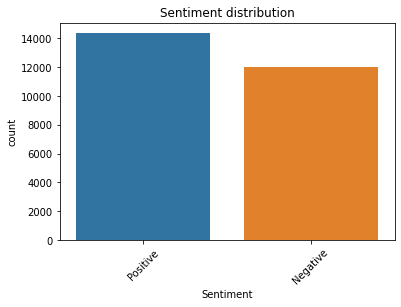

In [51]:
import seaborn as sns
sns.countplot('Sentiment',data = Dataset)
plt.xticks(rotation=45)
plt.title("Sentiment distribution")

In [52]:
X = Dataset['CleanedText']
Y = Dataset['Sentiment']

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit_transform(Y)


array([1, 1, 1, ..., 0, 1, 0])

In [54]:
#converting text to numbers
vc = TfidfVectorizer()
vc.fit(X)
X= vc.transform(X)

In [55]:
#spliting the dataset to train, test
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,stratify = Y)

Logistic Regression

In [56]:
#Trainning the model
lg = LogisticRegression()
lg.fit(X_train,Y_train)

LogisticRegression()

In [57]:
#Logistic Regression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.metrics import classification_report
pred =  lg.predict(X_test)
acc = accuracy_score(pred,Y_test)

In [68]:
print("Accuracy for Logistic Regression",acc)

Accuracy for Logistic Regression 0.7903011934078424


In [71]:
#Classification Report for Logistic Regression
print( classification_report(Y_test, pred) )

              precision    recall  f1-score   support

    Negative       0.92      0.77      0.84      2402
    Positive       0.83      0.94      0.88      2877

    accuracy                           0.87      5279
   macro avg       0.87      0.86      0.86      5279
weighted avg       0.87      0.87      0.86      5279



Confusion matrix, without normalization
[[1899  503]
 [ 399 2478]]
Normalized confusion matrix
[[0.79059117 0.20940883]
 [0.13868613 0.86131387]]


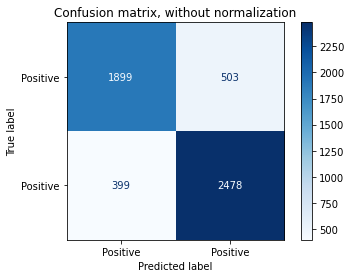

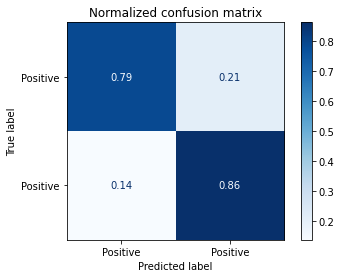

In [74]:
#ConfusionMatrix for Logistic Regression
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
class_names= Dataset['Sentiment']
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        lg,
        X_test,
        Y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [60]:
df = pd.DataFrame({"pred":pred,'y-test':Y_test})
df

,pred,y-test
15988,Positive,Positive
15944,Negative,Negative
37181,Negative,Negative
34682,Positive,Positive
31943,Negative,Negative
...,...,...
14820,Positive,Positive
12805,Positive,Positive
4684,Positive,Positive
20366,Negative,Negative


MultinomialNB

In [61]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()
mn.fit(X,Y)

MultinomialNB()

In [69]:
pred =  mn.predict(X_test)
acc = accuracy_score(pred,Y_test)
print("Accuracy for MultinomialNB",acc)

Accuracy for MultinomialNB 0.8651259708278083


Confusion matrix, without normalization
[[1858  544]
 [ 168 2709]]
Normalized confusion matrix
[[0.77352206 0.22647794]
 [0.05839416 0.94160584]]


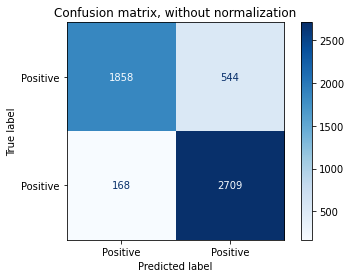

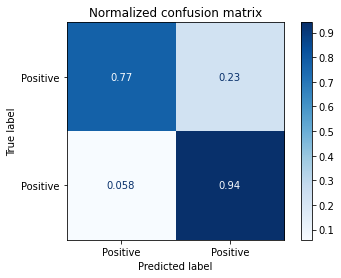

In [76]:
#ConfusionMatrix for Logistic Regression
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
class_names= Dataset['Sentiment']
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        mn,
        X_test,
        Y_test,
        display_labels=class_names,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [63]:
df = pd.DataFrame({"pred":pred,'y-test':Y_test})
df

,pred,y-test
15988,Positive,Positive
15944,Negative,Negative
37181,Negative,Negative
34682,Positive,Positive
31943,Negative,Negative
...,...,...
14820,Positive,Positive
12805,Positive,Positive
4684,Positive,Positive
20366,Negative,Negative


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# define models and parameters
model = MultinomialNB()
alpha = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=2)
grid_search = RandomizedSearchCV(estimator=model, param_distributions=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X,Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.774700 using {'alpha': 0.6}
0.760553 (0.006518) with: {'alpha': 0.1}
0.768396 (0.006638) with: {'alpha': 0.2}
0.771078 (0.007016) with: {'alpha': 0.3}
0.773381 (0.007143) with: {'alpha': 0.4}
0.774533 (0.007243) with: {'alpha': 0.5}
0.774700 (0.007246) with: {'alpha': 0.6}
0.774147 (0.007360) with: {'alpha': 0.7}
0.773252 (0.007275) with: {'alpha': 0.8}
0.772237 (0.007531) with: {'alpha': 0.9}
0.771366 (0.007522) with: {'alpha': 1.0}


RandomForestClassifier

In [65]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier()
rm.fit(X_train,Y_train)

RandomForestClassifier()

In [66]:
pred =  rm.predict(X_test)
acc = accuracy_score(pred,Y_test)
acc

0.7903011934078424

In [ ]:
# example of grid searching key hyperparameters for RandomForestClassifier

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# define dataset

# define models and parameters
model = RandomForestClassifier()
n_estimators = [1, 2, 3]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.710374 using {'max_features': 'sqrt', 'n_estimators': 3}
0.665972 (0.011104) with: {'max_features': 'sqrt', 'n_estimators': 1}
0.654493 (0.011451) with: {'max_features': 'sqrt', 'n_estimators': 2}
0.710374 (0.010745) with: {'max_features': 'sqrt', 'n_estimators': 3}
0.615584 (0.011972) with: {'max_features': 'log2', 'n_estimators': 1}
0.599772 (0.008069) with: {'max_features': 'log2', 'n_estimators': 2}
0.657309 (0.007027) with: {'max_features': 'log2', 'n_estimators': 3}


Ridge Classifier

In [77]:
from sklearn.linear_model import RidgeClassifier
rc = RidgeClassifier()
rc.fit(X_train,Y_train)

RidgeClassifier()

In [78]:
pred =  rm.predict(X_test)
acc = accuracy_score(pred,Y_test)
acc

0.7903011934078424

In [79]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

# define dataset

# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X,Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.834540 using {'alpha': 1.0}
0.789278 (0.006112) with: {'alpha': 0.1}
0.806782 (0.005645) with: {'alpha': 0.2}
0.815445 (0.005913) with: {'alpha': 0.3}
0.821153 (0.006001) with: {'alpha': 0.4}
0.825472 (0.005606) with: {'alpha': 0.5}
0.828339 (0.005109) with: {'alpha': 0.6}
0.830713 (0.004937) with: {'alpha': 0.7}
0.832557 (0.004794) with: {'alpha': 0.8}
0.833605 (0.004877) with: {'alpha': 0.9}
0.834540 (0.005137) with: {'alpha': 1.0}
